Link to dataset:
* https://www.kaggle.com/datasnaek/youtube-new

# Câu 1:

In [56]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt
from scipy import stats

In [57]:
# Read and preview data
df = pd.read_csv('USvideos.csv')[0:1000]
# print(df['views'])
# print(df.head(2))

#drop unused columns
fields = ['video_id', 'title', 'channel_title', 'publish_time', 'tags', 'thumbnail_link', 'description', 'ratings_disabled', 'video_error_or_removed']
df = df.drop(fields, axis=1)


In [58]:
#corr()
#get correlation data
df.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled
category_id,1.000000,-0.139054,-0.157531,-0.086604,-0.121578,0.078601
views,-0.139054,1.000000,0.912783,0.740309,0.811088,-0.035255
likes,-0.157531,0.912783,1.000000,0.637938,0.861089,-0.032952
dislikes,-0.086604,0.740309,0.637938,1.000000,0.766468,-0.031571
comment_count,-0.121578,0.811088,0.861089,0.766468,1.000000,-0.037214
comments_disabled,0.078601,-0.035255,-0.032952,-0.031571,-0.037214,1.000000


#### SETTING BOOTSTRAP FUNCTION TO GET SAMPLING DISTRIBUTION AND CONFIDENCE INTERVAL

In [59]:
def bootstrap(data, n, Nboot, x, myfunc):
    data =  np.array(data)
    
    resampled_stat = []
    confidence_point = []
    for k in range(Nboot):
        #lay mau co hoan lai
        # pick_index = np.random.randint(len(data)-n)
        # new_data = data[pick_index: pick_index + 500]
        index = np.random.randint(0, 1000, n)
        sample = data[index]
        bstatistic = myfunc(sample)
        resampled_stat.append(bstatistic)
    
    #find the confidence interval
    resampled_stat_sorted = resampled_stat.copy()
    resampled_stat_sorted.sort()
    cut = int((100-x)/2)
    first_point = resampled_stat_sorted[cut]
    end_point = resampled_stat_sorted[len(resampled_stat_sorted) - cut]
    confidence_point.append([first_point, end_point])
    return [resampled_stat,confidence_point]

#### Chọn biến đặc trưng là views, và thông số thống kê là giá trị trung bình


* sample size n = 500
* numbers of bootstrap samplings M = 500
* confidence interval in % x = 90%

In [60]:
# lấy 1000 mẫu đầu tiên
views_data = df['views']
number_of_bootstrap_samplings = 500
sample_size = 500
confidence_interval = 90
[views_data_bootstrap, views_data_confidence_point] = bootstrap(views_data, sample_size, number_of_bootstrap_samplings, confidence_interval, np.mean)

#### PRINT FUNCTION

In [61]:
# print mean, std, confidence_point
def MeanStdAndConfidencePrint(var_name, data, data_bootsrap, confidence_point):
    print("\n", var_name, "\n")
    print("mean old_data: " + str(np.mean(data)));
    print("mean new_data: " + str(np.mean(data_bootsrap)));
    print("std new_data: " + str(np.std(data_bootsrap)));
    print("confidence_point: " + str(confidence_point));

In [62]:
# print the mean, std, confidence_point of old_data and new_data after bootstrap-ed
MeanStdAndConfidencePrint("VIEWS: ", views_data, views_data_bootstrap, views_data_confidence_point)


 VIEWS:  

mean old_data: 1015634.439
mean new_data: 1018449.063588
std new_data: 140257.64702399293
confidence_point: [[700723.058, 1434157.0]]


### PHAN BO LAY MAU HISTOGRAM VA DAI TIN CAY CUA GTTB

In [63]:
# histogram function 
def histogram (data_bootstrap, confidence_point):
    plt.hist(data_bootstrap,  bins=50)
    plt.axvline(confidence_point[0][0], color='y', linestyle='-', linewidth=1)
    plt.axvline(confidence_point[0][1], color='r', linestyle='-', linewidth=1)
    plt.axvline(np.mean(data_bootstrap), color='k', linestyle='-', linewidth=1)
    plt.text(np.mean(data_bootstrap), 26, "mean: " + str(np.mean(round(np.mean(data_bootstrap)))))
    plt.text(confidence_point[0][0], 26, str(round(confidence_point[0][0])))
    plt.text(confidence_point[0][1], 26, str(round(confidence_point[0][1])))

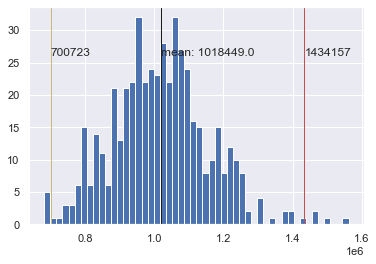

In [64]:
# histogram of views_data (mean)
histogram(views_data_bootstrap, views_data_confidence_point)

*** Phân bố lấy mẫu (sampling distribution) của một thông số thống kê là phân bố xác suất của thông số thống kê trên nhiều tập mẫu được lấy từ cùng một quần thể

# Câu 2:

##### THỐNG KÊ MÔ TẢ QUAN TRỌNG GIỮA CÁC BIẾN, MỐI QUAN HỆ GIỮA CHÚNG

* Bổ sung các biến: LIKES, DISLIKES, COMMENT, CATEGORY

#### COUNTPLOT

<AxesSubplot:xlabel='category_id', ylabel='count'>

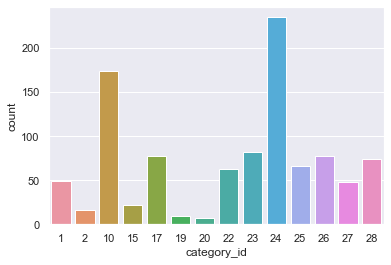

In [65]:
# Sử dụng biểu độ cột thống kê số lượng video theo thể loại
sns.countplot(data=df, x="category_id")

-> Videos thuộc thể loại Entertainment có số lượng nhiều nhất vào khoảng 10000 videos(), thể loại Nonprofits & Activism có số videos ít nhất

### BOXPLOT

<AxesSubplot:xlabel='category_id', ylabel='views'>

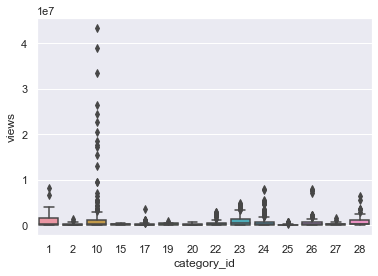

In [66]:
# Boxplot thể hiện mối quan hệ giữa thể loại và views
sns.boxplot(data=df, x="category_id", y="views")

-> Tuy thể loại Education, News & Politics có số lượng videos nhiều hơn Autos & Vehicles, Travel & Events, nhưng số views lại ít hơn! Phần lớn phân bố trung bình theo thể loại nằm dưới mức 300000 nghìn, đối với Music và Entertainment thì có số views rất cao

<AxesSubplot:xlabel='category_id', ylabel='likes'>

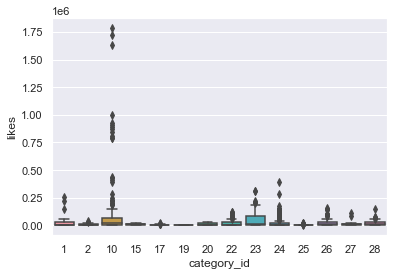

In [67]:
# Boxplot thể hiện mối quan hệ giữa thể loại và likes
sns.boxplot(data=df, x="category_id", y="likes")

=> Videos âm nhạc có số lượng ít hơn videos giải trí nhưng số likes và views cao hơn 

<AxesSubplot:xlabel='category_id', ylabel='dislikes'>

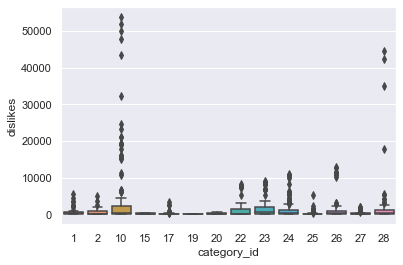

In [68]:
# Boxplot thể hiện mối quan hệ giữa thể loại và dislikes
sns.boxplot(data=df, x="category_id", y="dislikes")

=> Video Entertainment có lượt likes cao đồng thời dislikes có nhiều giá trị cũng cao

<AxesSubplot:xlabel='category_id', ylabel='comment_count'>

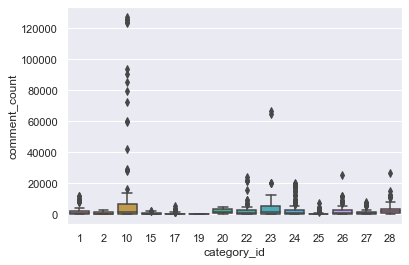

In [69]:
# Boxplot thể hiện mối quan hệ giữa thể loại và comment_count
sns.boxplot(data=df, x="category_id", y="comment_count")

=> Các video giải trí thường có số lượng bình luận cao

### JOINTFLOT

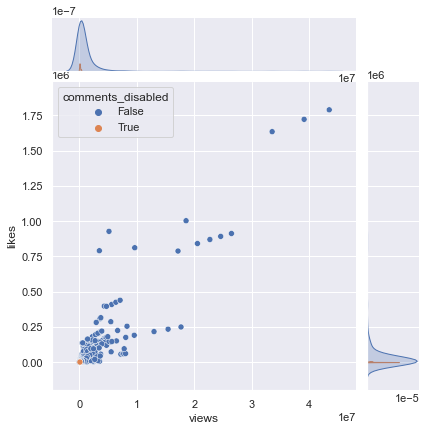

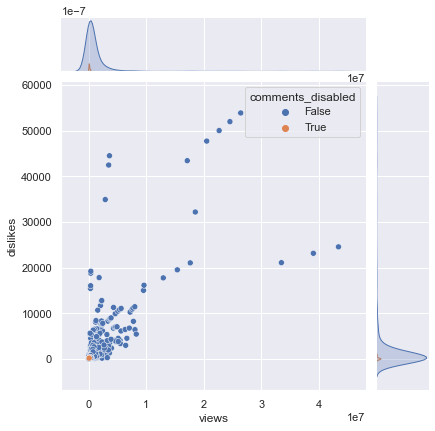

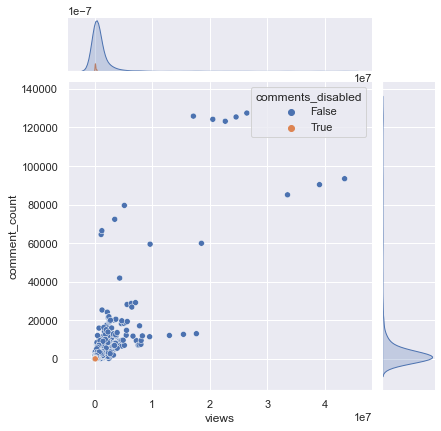

In [70]:
sns.jointplot(data=df, x="views", y="likes", hue="comments_disabled")
sns.jointplot(data=df, x="views", y="dislikes", hue="comments_disabled")
sns.jointplot(data=df, x="views", y="comment_count", hue="comments_disabled")

### HEATMAP

<AxesSubplot:xlabel='category_id', ylabel='trending_date'>

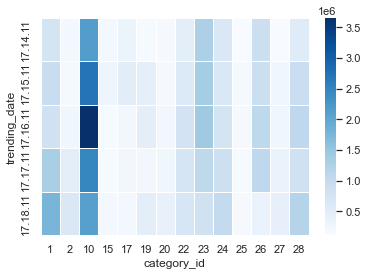

In [71]:
flights = pd.pivot_table(df, index = 'trending_date', columns ='category_id', values = 'views')
sns.heatmap(data=flights, cmap ='Blues', linecolor='white', linewidths=1)

Biểu đồ heatmap:
Nhìn vào đây ta sẽ biến được ngày nào, thể loại nào được xem nhiều nhất! Trending videos theo từng ngày
=> Dữ liệu từ ngày 14->18, sẽ thấy ngày 16 videos thuộc Music có views rất cao so với còn lại!


##### Bổ sung các quan hệ: Mean, Median, Node, STD

#### MEANS (Trung Bình)

In [72]:
# take the 1000 first datas
likes_data = df['likes']
dislikes_data = df['dislikes']
comments_data = df['comment_count']

In [73]:
# get the mean data of bootstrap method
[likes_data_bootstrap, likes_data_confidence_point] = bootstrap(likes_data, sample_size, number_of_bootstrap_samplings, confidence_interval, np.mean)
[dislikes_data_bootstrap, dislikes_data_confidence_point] = bootstrap(dislikes_data, sample_size, number_of_bootstrap_samplings, confidence_interval, np.mean)
[comments_data_bootstrap, comments_data_confidence_point] = bootstrap(comments_data, sample_size, number_of_bootstrap_samplings, confidence_interval, np.mean)

In [74]:
# print values
MeanStdAndConfidencePrint("LIKES", likes_data, likes_data_bootstrap, likes_data_confidence_point)
MeanStdAndConfidencePrint("DISLIKES", dislikes_data, dislikes_data_bootstrap, dislikes_data_confidence_point)
MeanStdAndConfidencePrint("COMMNENTS", comments_data, comments_data_bootstrap, comments_data_confidence_point)


 LIKES 

mean old_data: 38662.887
mean new_data: 38660.779352
std new_data: 5584.244694781783
confidence_point: [[27014.784, 52461.492]]

 DISLIKES 

mean old_data: 1586.733
mean new_data: 1571.918676
std new_data: 227.4478305523599
confidence_point: [[1115.742, 2159.884]]

 COMMNENTS 

mean old_data: 3852.339
mean new_data: 3834.375352
std new_data: 540.7806955462927
confidence_point: [[2726.652, 5164.422]]


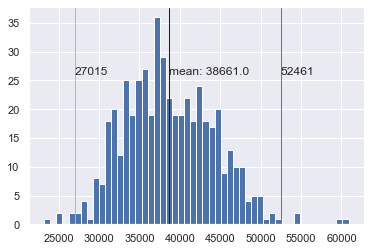

In [75]:
# histogram mean likes
histogram(likes_data_bootstrap, likes_data_confidence_point)

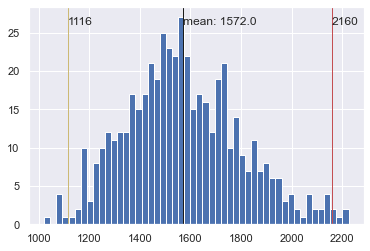

In [76]:
# histogram mean dislikes
histogram(dislikes_data_bootstrap, dislikes_data_confidence_point)

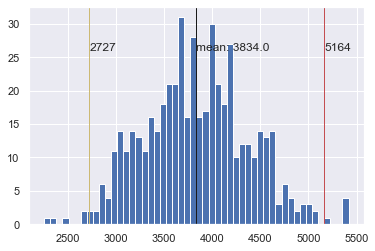

In [77]:
# histogram mean dislikes
histogram(comments_data_bootstrap, comments_data_confidence_point)

##### TRUC QUAN HOA DU LIEU

In [78]:
#Chia frame de quan sat du lieu
def divide_frame(data, size_of_frame):
    time = int(len(data)/size_of_frame)
    data_framed = []
    for i in list(range(time)):
        x = np.mean(data[i*(size_of_frame): (i+1)*(size_of_frame)])
        data_framed.append(x)
        
    return data_framed


In [79]:
views_data_bootstrap_framed  = divide_frame(views_data_bootstrap, 50)
likes_data_bootstrap_framed  = divide_frame(likes_data_bootstrap, 50);
dislikes_data_bootstrap_framed  = divide_frame(dislikes_data_bootstrap, 50);
comments_data_bootstrap_framed  = divide_frame(comments_data_bootstrap, 50);

##### CHUAN HOA DU LIEU

In [80]:
# views_data_bootstrap_framed = views_data_bootstrap_framed/max(views_data_bootstrap_framed)
# likes_data_bootstrap_framed = likes_data_bootstrap_framed/max(likes_data_bootstrap_framed)
# dislikes_data_bootstrap_framed = dislikes_data_bootstrap_framed/max(dislikes_data_bootstrap_framed)
# comments_data_bootstrap_framed = comments_data_bootstrap_framed/max(comments_data_bootstrap_framed)

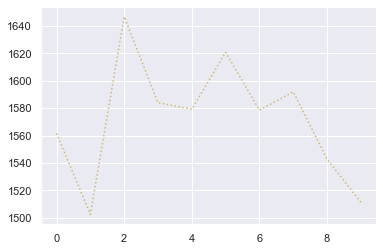

In [81]:
# plt.plot(views_data_bootstrap_framed, linestyle='solid', color='b')
# plt.plot(likes_data_bootstrap_framed, linestyle='dashed', color='g')
plt.plot(dislikes_data_bootstrap_framed, linestyle='dotted', color='y')
# plt.plot(comments_data_bootstrap_framed, linestyle='dashdot', color='r')
# plt.legend(["views", "likes", "dislikes", "comments"], loc ="lower right")

#### MEDIAN (Trung vị)

In [82]:
# get the median data of bootstrap method
[likes_data_median_bootstrap, likes_data_median_confidence_point] = bootstrap(likes_data, sample_size, number_of_bootstrap_samplings, confidence_interval, np.median)
[dislikes_data_median_bootstrap, dislikes_data_median_confidence_point] = bootstrap(dislikes_data, sample_size, number_of_bootstrap_samplings, confidence_interval, np.median)
[comments_data_median_bootstrap, comments_data_median_confidence_point] = bootstrap(comments_data, sample_size, number_of_bootstrap_samplings, confidence_interval, np.median)

In [83]:
# print values
MeanStdAndConfidencePrint("LIKES", likes_data, likes_data_median_bootstrap, likes_data_median_confidence_point)
MeanStdAndConfidencePrint("DISLIKES", dislikes_data, dislikes_data_median_bootstrap, dislikes_data_median_confidence_point)
MeanStdAndConfidencePrint("COMMNENTS", comments_data, comments_data_median_bootstrap, comments_data_median_confidence_point)


 LIKES 

mean old_data: 38662.887
mean new_data: 6982.657
std new_data: 765.9701318269531
confidence_point: [[5735.5, 8932.5]]

 DISLIKES 

mean old_data: 1586.733
mean new_data: 227.448
std new_data: 32.66379181907698
confidence_point: [[174.5, 324.0]]

 COMMNENTS 

mean old_data: 3852.339
mean new_data: 863.064
std new_data: 96.84788022460792
confidence_point: [[652.0, 1060.5]]


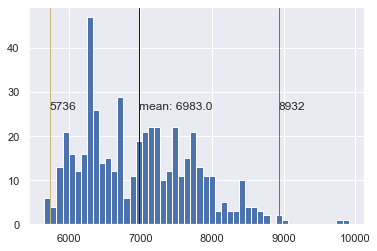

In [84]:
histogram(likes_data_median_bootstrap, likes_data_median_confidence_point)

#### MODE (Yếu Vị)

In [85]:
[likes_data_mode_bootstrap, likes_data_mode_confidence_point] = bootstrap(likes_data, sample_size, number_of_bootstrap_samplings, confidence_interval, stats.mode)
[dislikes_data_mode_bootstrap, dislikes_data_mode_confidence_point] = bootstrap(dislikes_data, sample_size, number_of_bootstrap_samplings, confidence_interval, stats.mode)
[comments_data_mode_bootstrap, comments_data_mode_confidence_point] = bootstrap(comments_data, sample_size, number_of_bootstrap_samplings, confidence_interval, stats.mode)

#### STD (Độ Lệch Chuẩn)

In [86]:
[likes_data_std_bootstrap, likes_data_std_confidence_point] = bootstrap(likes_data, sample_size, number_of_bootstrap_samplings, confidence_interval, np.std)
[dislikes_data_std_bootstrap, dislikes_data_std_confidence_point] = bootstrap(dislikes_data, sample_size, number_of_bootstrap_samplings, confidence_interval, np.std)
[comments_data_std_bootstrap, comments_data_std_confidence_point] = bootstrap(comments_data, sample_size, number_of_bootstrap_samplings, confidence_interval, np.std)